In [0]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import random

In [0]:
# random seed to ensure reproducibility

np.random.seed(1337)
random.seed(1337)

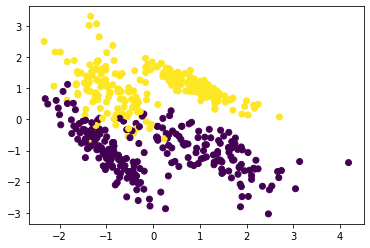

In [250]:
# we create a toy dataset and visualize it. random_state is for reproducibility
# we generate a toy binary dataset of label values of 0 or 1, having no of features = 2

x_train, y_train = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=1)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

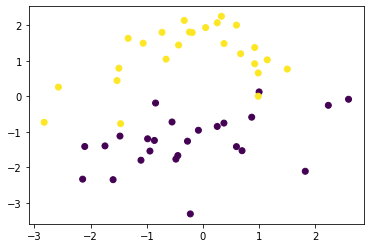

In [251]:
# now we create a toy validation dataset. again random_state is used for reproducibility
# the validation set like the training set should contain the same number of features

x_val, y_val = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

plt.scatter(x_val[:,0], x_val[:,1], c=y_val)

In [0]:
# we define the sigmoid function here

def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [0]:
# since we have two features our equation is y_i = w_1*x_i_1 + w_2*x_i_2 + b
# we set np.random.seed for reproducibility purposes
np.random.seed(1337)
theta = np.random.randn(1,2)
bias = [1]
theta = theta[0]

def forward(x):
  results = np.dot(theta, x.T)
  results = results.reshape((-1, 1))
  results = results + bias
  results = sigmoid(results)
  return results

In [0]:
# now we define the loss. we are going to define 'Mean Squared Error' Loss

def MSELoss(y, y_pred):
  return (y_pred - y)**2

In [0]:
# now the most critical part. we implement the gardient functions. 
# we will be followilng the gradient descent optimization function.
# Function J_grad defines the 'derivative of loss function w.r.t to theta' i.e.
# dJ/d_theta assuming the equation y_cap = sigmoid(X*W + b) and loss function 
# J = 0.5*(y_pred - y)**2

def J_grad(y_pred, y, x, theta, bias=False):
  """
  y_pred = predicted y values
  y = target y values
  theta = weight parameters
  bias = bias in the logistic regression equation. If bias=True, no need for 
        multiplying with x
  """
  if bias:
    return (y_pred-y)*(y_pred*(1-y_pred))*1
    
  return (y_pred-y)*(y_pred*(1-y_pred))*x #element wise multiplication. not dot product




In [256]:
# now we actually 'train' the network.
# we follow the gradient descent optimization algorithm.
# input -> forward -> backprop -> update -> repeat

epochs = 50
losslist = []
lr = 0.01

y_train = y_train.reshape((-1, 1)) #just some shape fix
for i in range(epochs):
  
  y_pred = forward(x_train)
  
  loss = MSELoss(y_train, y_pred)
  avg_loss = np.sum(loss)/loss.shape[0]
  losslist.append(avg_loss)

  djdw = J_grad(y_pred, y_train, x_train, theta)
  djdw = np.sum(djdw, axis=0)/djdx.shape[0]

  djdb = J_grad(y_pred, y_train, x_train, theta, bias=True)
  djdb = np.sum(djdb, axis=0)/djdb.shape[0]
  
  #perform update
  theta -= lr*djdw
  bias -= lr*djdb
  
  if i%2 == 0:
    print("For {}th epoch, loss: {}".format(i, avg_loss))

  

For 0th epoch, loss: 0.40571056871554984
For 2th epoch, loss: 0.31063880428954793
For 4th epoch, loss: 0.23741623033803938
For 6th epoch, loss: 0.1859257124793009
For 8th epoch, loss: 0.15270712368175873
For 10th epoch, loss: 0.1313080737185497
For 12th epoch, loss: 0.11696314610142597
For 14th epoch, loss: 0.10688903727174968
For 16th epoch, loss: 0.09950554857759936
For 18th epoch, loss: 0.0938914412294984
For 20th epoch, loss: 0.08948828101822513
For 22th epoch, loss: 0.08594388242079701
For 24th epoch, loss: 0.08302779582499756
For 26th epoch, loss: 0.08058411705088969
For 28th epoch, loss: 0.07850417694040833
For 30th epoch, loss: 0.07671018397821094
For 32th epoch, loss: 0.075145109874473
For 34th epoch, loss: 0.07376624987172414
For 36th epoch, loss: 0.07254101167245633
For 38th epoch, loss: 0.07144409369489654
For 40th epoch, loss: 0.07045555164424899
For 42th epoch, loss: 0.06955944643548487
For 44th epoch, loss: 0.06874288081746878
For 46th epoch, loss: 0.06799530107332669
Fo

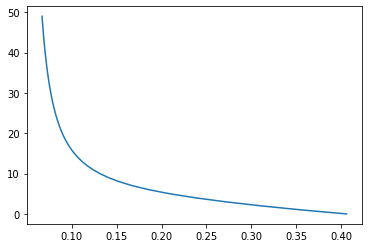

In [257]:
# we visualize the training loss curve here
plt.plot(losslist, range(len(losslist)))

In [258]:
# now we run the val test through the 'trained' model
# no backprop since its validation mode

y_val = y_val.reshape((-1, 1)) #shape fix

val_loss = []

preds = forward(x_val)
loss = MSELoss(y_val, preds)
val_loss = np.sum(loss, axis=0)/preds.shape[0]
print("validation loss: ", val_loss)

validation loss:  [0.08768029]


In [280]:
# we check what our model is predicting

for idx in range(len(y_val)):
  if idx % 3 == 0:
    print("idx:{}, true value: {}, predicted_value: {}, rounded_value: {}, loss: {}".format(idx, y_val[idx], preds[idx], np.round(preds[idx]), loss[idx]))


idx:0, true value: [0], predicted_value: [0.02937937], rounded_value: [0.], loss: [0.00086315]
idx:3, true value: [0], predicted_value: [0.53967432], rounded_value: [1.], loss: [0.29124837]
idx:6, true value: [1], predicted_value: [0.99933704], rounded_value: [1.], loss: [4.39520848e-07]
idx:9, true value: [1], predicted_value: [0.93183744], rounded_value: [1.], loss: [0.00464613]
idx:12, true value: [1], predicted_value: [0.99659586], rounded_value: [1.], loss: [1.1588167e-05]
idx:15, true value: [0], predicted_value: [0.06693502], rounded_value: [0.], loss: [0.0044803]
idx:18, true value: [0], predicted_value: [0.06022119], rounded_value: [0.], loss: [0.00362659]
idx:21, true value: [1], predicted_value: [0.99325631], rounded_value: [1.], loss: [4.54773128e-05]
idx:24, true value: [1], predicted_value: [0.99402403], rounded_value: [1.], loss: [3.57121619e-05]
idx:27, true value: [1], predicted_value: [0.83832341], rounded_value: [1.], loss: [0.02613932]
idx:30, true value: [0], predi